# Проект урока 6. Оконные функции и интерактивные графики
#  «Анализ средних цен на авокадо»

## Шаг 1

Представьте, что вы — аналитик в агентстве, специализирующемся на изучении рынка продуктов питания. Вам поручено исследовать тренды цен на авокадо и проанализировать средние значения. Для этого у вас есть данные от Hass Avocado Board:

- Date — дата  
- AveragePrice — средняя цена одного авокадо  
- Total Volume — количество проданных авокадо  
- 4046 — количество проданных авокадо PLU 4046 (PLU — код товара, Product Lookup code)  
- 4225 — количество проданных авокадо PLU 4225  
- 4770 — количество проданных авокадо PLU 4770  
- Total Bags — всего упаковок  
- Small Bags — маленькие упаковки  
- Large Bags — большие  
- XLarge Bags — очень большие  
- type — обычный или органический  
- year — год  
- Region — город или регион the city or region of the observation  

В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. 

Вы можете решать задания тем способом, который считаете наиболее удобным или оптимальным. А для того, чтобы лучше понять задание, следуйте по шагам выполнения. Бывает, что их можно выполнить в одну строчку, применяя методы друг за другом. А если выполняете шаги отдельно, не забудьте сохранить результат в переменную, чтобы на следующем шаге работать именно с ней.

В ноутбуке место для вашего решения обозначено комментарием `# Ваш код здесь`, но вы можете писать код там, где вам удобно, добавлять или удалять ячейки с кодом или текстом по вашему усмотрению.

Кроме того можно посмотреть подсказки, кликнув на строчку `► Нажмите сюда, чтобы увидеть подсказку`. Также не забывайте о наличии конспектов и возможности задать вопрос в Discord, ссылка на нужный тред есть на странице каждого шага в LMS

## Шаг 2

Для начала нас будут интересовать общие данные, без разбивки по типам авокадо и регионам. Прочитайте данные и сохраните датафрейм в переменную `avocado_full`. **Для каждой даты посчитайте усредненное значение средних цен на авокадо (см.колонку `AveragePrice`).** Сохраните результат в переменную `avocado_mean`.

**Какое усредненное значение цены получилось в первой строчке, за 4 января 2015 года?** Округлять результат не нужно. В качестве разделителя дробной части используйте точку.

Шаги выполнения:  
1. Импортируйте библиотеку pandas

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Для импорта библиотеки напишите
```python
import library as shortcut
```
где вместо `library` подставьте название библиотеки, а вместо `shortcut` - её общераспространённое сокращённое название
</p>
</details>

In [2]:
import pandas as pd



2. Загрузите csv файл к уроку в свою папку в JupyterНub
3. Прочитайте этот датасет, сохранив результат в переменную `avocado_full`. Укажите, что колонку `Date` нужно прочитать как дату

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Данные находятся в файле формата CSV. Для их загрузки воспользуемся функцией `pd.read_csv()`, передав в качестве аргумента путь к файлу. В параметр `parse_dates` передайте список, содержащий название единственной колонки - `Date`. Например,
```python
df = pd.read_csv('data.csv', parse_dates=['col_date'])
```
считает файл `data.csv`, хранящийся в той же папке, что и юпитер ноутбук, в котором вы сейчас работаете. В колонке `col_date` тип данных будет datetime
</p>
</details>

In [3]:
avocado_full = pd.read_csv('data/avocado_full.csv', parse_dates=['Date'])
avocado_full.dtypes


Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

4. Посмотрите на содержимое датафрейма, проверьте его размер

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как посмотреть на содержимое датафрейма?** Используйте метод `head()`

**Как проверить размер датафрейма?** Используйте атрибут `shape`, чтобы узнать количество строк и столбцов. Этот атрибут возвращает кортеж, первый элемент которого указывает на количество строк, а второй — на количество столбцов в датафрейме.  
      
**Как обратиться к атрибуту датафрейма?** Для этого нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
так мы обратимся к атрибуту `some_attribute` у датафрейма в переменной `df` 
      
**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [4]:
print(avocado_full.shape)
avocado_full.head(5)


(18249, 13)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


5. Сгруппируйте данные по дате и посчитайте для каждой даты усредненное значение средних цен на авокадо (см.колонку `AveragePrice`). Результат сохраните в переменную `avocado_mean`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Сгруппируйте данные по столбцу `Date`, используя метод `groupby()`**. Его вызов группирует строки по значениям в какой-то колонке (или комбинации значений из нескольких колонок). Например,

```python
df.groupby('month')
```
сгруппирует данные датафрейма `df` по колонке `month`. Сама по себе группировка не вычисляет что-то по группам.

**После группировки используйте метод `mean()` для столбца `AveragePrice`**. Этот метод посчитает среднее всех значений в указанном столбце.

**Как использовать метод?** Давайте применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```

**Как использовать метод сразу после группировки?** Применим метод `some_method()` к колонке `column_name_2` после группировки по столбцу `column_name_1` датафрейма `df`:
```python
df.groupby('column_name_1').column_name_2.some_method()
```      
      
**Как сохранить результат?** Например применим метод `some_method()` к датафрейму `df` и сохраним результат в переменную `new_df`:
```python
new_df = df.some_method()
```
</p>
</details>

In [29]:
new_df = avocado_full.groupby('Date')['AveragePrice'].mean().reset_index()
new_df.rename(columns={'AveragePrice': 'avocado_mean'}, inplace=True)
new_df.head(5)




,Date,avocado_mean
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


6. Посмотрите на значение усредненной цены в первой строчке получившейся переменной `avocado_mean`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Это можно сделать без кода, просто глазами.
      
Если в первой строчке у вас стоит не 4 января 2015 года, а другая дата - вероятно, вы что-то сделали не так, вернитесь на предыдущий шаг выполнения
</p>
</details>

## Шаг 3

Перед тем, как приступить к подсчету скользящего среднего, убедитесь, что вы знаете параметры метода `rolling`, представленные в [документации pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html). Установите соответствие между каждым параметром и его описанием.

Шаги выполнения:  
1. Откройте документацию по ссылке: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html и прочитайте, что значит каждый из параметров

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
При необходимости воспользуйтесь переводчиком
</p>
</details>

## Шаг 4

**Теперь на полученных во втором шаге данных посчитайте скользящее среднее цены авокадо, с окном равным 3. Чему равно максимальное значение?** Ответ округлите до двух знаков после точки.

Шаги выполнения:  
1. На данных из переменной `avocado_mean ` посчитайте скользящее среднее цены авокадо, с окном равным 3

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как посчитать скользящее среднее, с окном равным 3?** Используйте комбинацию методов: сначала метод `rolling()`, в котором задайте параметр `window` равным 3; а после него - метод `mean`.
    
**Как использовать комбинацию методов?** Например применим сначала метод `some_method_1()` к серии `series` и зададим параметр `parameter` равным 5, а после него - метод `some_method_2()`:
```python
series.some_method_1(parameter=5).some_method_2()
```
      
Если в переменной `avocado_mean` у вас получилась не серия с датой в индексе, а датафрейм с двумя колонками (дата и средняя цена), то применяйте метод `rolling()` к колонке `AveragePrice` этого датафрейма. Пример синтаксиса:
```python
df.col_name.some_method_1(parameter=5).some_method_2()
```      
</p>
</details>

In [36]:
temp_df = new_df['Date']
new_df1 = new_df.drop('Date', axis=1)
df_rolling = new_df1.rolling(window=3).mean()
df_rolling = pd.concat([temp_df, df_rolling], axis=1)
df_rolling.head(5)



,Date,avocado_mean
0,2015-01-04,NaN
1,2015-01-11,NaN
2,2015-01-18,1.354352
3,2015-01-25,1.386296
4,2015-02-01,1.345093


2. Посмотрите на получившиеся значения - теперь к каждой дате относится среднее значение, полученное из значений за этот и два предыдущих дня. Первые две записи должны содержать `NaN`
3. Определите максимальное значение из получившихся скользящих средних

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как определить максимальное значение?** Используйте метод `max()`
      
**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [7]:
df_max = df_rolling.sort_values(by='avocado_mean', ascending=False)
df_max = df_max.iloc[[0]]
print(df_max)



          Date  avocado_mean
144 2017-10-08      1.849321


4. Округлите максимальное значение до двух знаков после точки

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `round()`. По умолчанию округление идет до целого числа. Чтобы задать нужное число знаков после точки, передайте в метод аргумент — целое число. Например применим метод к колонке `column_name` датафрейма `df`, задав округление до пяти знаков после точки:
```python
df.column_name.round(5)
```

Если выполняете задание не в JupyterHub нашего курса, то может возникнуть ошибка `AttributeError: 'float' object has no attribute 'round'`, тогда вместо метода `round()` используйте встроенную функцию python `round`. Например:
```python
round(12.345, 1)
```
в результате получим число 12.3      
</p>
</details>

In [8]:
df_max['avocado_mean'] = df_max['avocado_mean'].round(2)
print(df_max)



          Date  avocado_mean
144 2017-10-08          1.85


## Шаг 5

Исследуйте, как размер окна влияет на сглаживание значения. **Постройте линейные графики и посмотрите, как изменится линия в зависимости от выбранного размера окна (2, 4, 10, 50). Соотнесите эти картинки с соответствующим значением размера окна:**

![](https://ucarecdn.com/c24cc8c4-4596-4d71-a6ca-b5ad8ac3cd6f/)

Шаги выполнения:  
1. Импортируйте библиотеку `seaborn` и модуль `pyplot` из библиотеки `matplotlib`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Для импорта библиотеки напишите**
```python
import library as shortcut
```
где вместо `library` подставьте название библиотеки, а вместо `shortcut` - её общераспространённое сокращённое название
      
**Для импорта модуля из библиотеки напишите**

```python
import library.module as shortcut
```
где вместо `library` подставьте название библиотеки, вместо `module` — название модуля, а вместо `shortcut` — его общераспространённое сокращённое название
</p>
</details>

In [9]:
import seaborn as sns



2. Создайте список `windows`, в котором перечислите значения размеров окна

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Чтобы создать список,** напишите в квадратных скобках числа, означающие размер окна, и сохраните это в переменную `windows`. Например, код:
```python
list_123 = [1, 2, 3]
```
создаст переменную `list_123`, в которой будет храниться список с тремя значениями: 1, 2 и 3
</p>
</details>

In [10]:
windows = [2, 4, 10, 50]




3. Постройте линейные графики с разными размерами окон, используя функцию `plt.subplots()` из библиотеки `matplotlib` и функцию `lineplot` из библиотеки `seaborn`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Выполните в одной ячейке:**
      
1. Сохраните в переменные `fig, axes` результат выполнения функции `plt.subplots` c аргументами `4, 1, figsize=(8, 12)`, где 4 - количество графиков по вертикали, 1 - количество графиков по горизонтали, figsize - общий размер фигуры из 4 графиков
      
2. Напишите цикл, чтобы на каждом его шаге генерилась пара переменных `i, window` с помощью функции `enumerate`, в которую передан список `windows` со значениями размера окна (с предыдущего шага выполнения). В теле цикла:  
      a. создавайте новый датафрейм, в котором на основе данных из `avocado_mean` считается скользящее среднее с размером окна, равным числу из переменной `window`  
      b. стройте график на основе этого датафрейма, используя функцию `sns.lineplot`. В параметр `ax` этой функции передайте `axes[i]`, чтобы на каждом шаге цикла график строился на своем месте  
      c. установите название для каждого графика, в котором пропишите размер окна. Для этого используйте `axes[i].set_title()`, f-строку и размер окна из переменной `window`
      
3. Используйте функцию `plt.tight_layout()`, чтобы интервал между графиками был корректным и графики не перекрывали друг друга
     
Пример синтаксиса:      

```python
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
for i, variable in enumerate(variables):
    df_new = df.some_method(some_parameter=variable)
    sns.barplot(data=df_new, ax=axes[i])
    axes[i].set_title(f'variable is {variable}')
plt.tight_layout()
```      
</p>
</details>

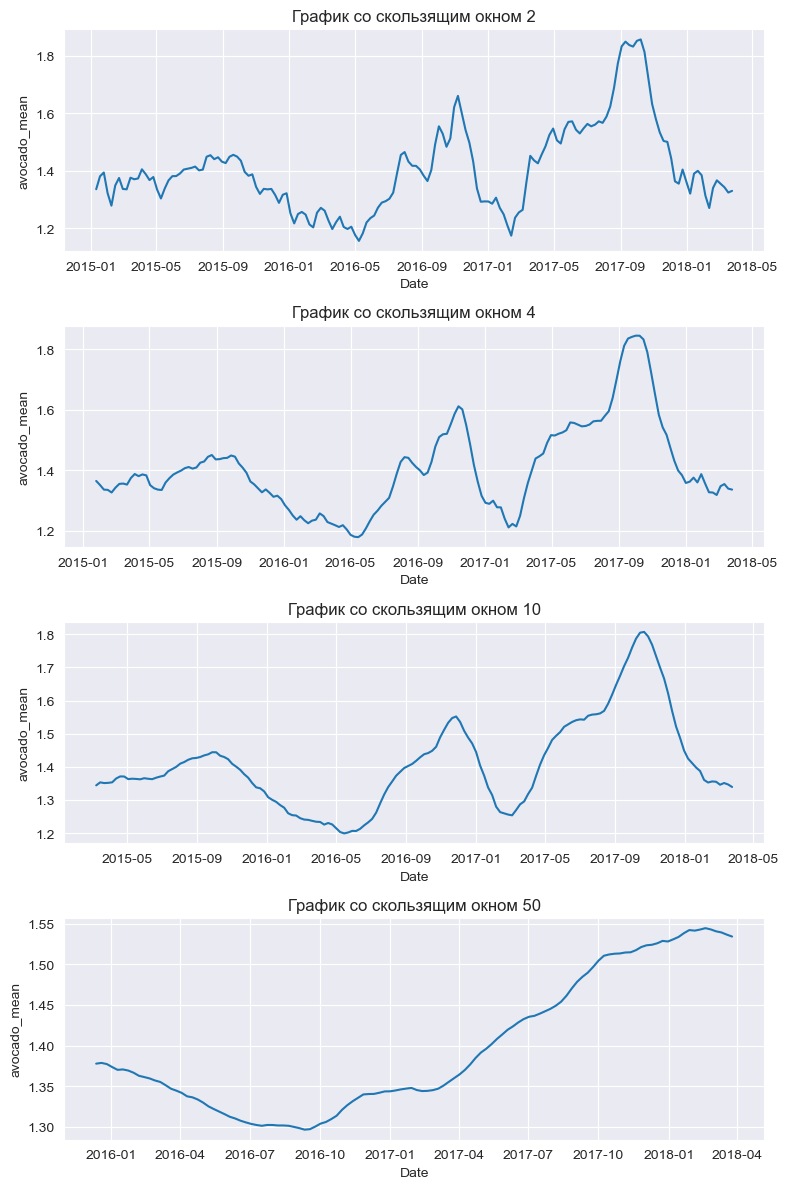

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(8, 12))
for i, window in enumerate(windows):
    tmp1 = new_df['Date']
    tmp2 = new_df.drop('Date', axis=1)
    tmp = tmp2.rolling(window=window).mean()
    tmp = pd.concat([tmp, tmp1], axis=1)
    sns.lineplot(data=tmp, x='Date', y='avocado_mean', ax=axes[i])
    axes[i].set_title(f'График со скользящим окном {window}')
plt.tight_layout()
plt.show()

4. Посмотрите на получившиеся графики и соотнесите картинки в LMS с соответствующим значением размера окна

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Обратите внимание на то, насколько сглаженными получились значения.
      
Цвет графика не играет роли
</p>
</details>

## Шаг 6

**Теперь посчитайте экспоненциальное скользящее среднее.** Используйте данные в переменной `avocado_mean` и метод `ewm()` с параметром `span`, равным 2. Результат запишите в переменную `avocado_ewm`.

**На LMS уже создана переменная `avocado_mean`. Загрузите в LMS ваш код, в котором сохраняете в переменную `avocado_ewm` расчет экспоненциального скользящего среднего**

Шаги выполнения:  
1. Посчитайте экспоненциальное скользящее среднее на основе данных из переменной `avocado_mean`. Используйте метод `ewm()` с параметром `span`, равным 2, и метод `mean()`. Результат запишите в переменную `avocado_ewm`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Как использовать методы `ewm()` и `mean()`? Напишите их друг за другом, сначала `ewm()`. В этом методе задайте параметр `span=2`
      
Например применим сначала метод `some_method_1()` к серии `series` и зададим параметр `parameter` равным 5, а после него - метод `some_method_2()`. Результат запишем в переменную `new_variable`:
```python
new_variable = series.some_method_1(parameter=5).some_method_2()
```

**Не забудьте сохранить результат в переменную `avocado_ewm`.**  
      
Если в `avocado_mean` к этому моменту у вас получилась не серия с датой в индексе, а датафрейм с двумя колонками (дата и средняя цена), то сначала переведите колонку с датой в индекс и сохраните результат в ту же переменную `avocado_mean` с помощью следующего кода:
```python
avocado_mean = avocado_mean.set_index('Date')
```      
**Этот код копировать в ЛМС не нужно**    
</p>
</details>

In [40]:
df_rolling.head(5)
df_tmp = df_rolling['Date']
df_rolling_tmp = df_rolling.drop('Date', axis=1)
df_rolling_ewm = df_rolling_tmp.ewm(span=2).mean()
df_rolling_ewm = df_rolling_ewm.rename(columns={'avocado_mean': 'avocado_mean_ewm'})
df_rolling_ewm = pd.concat([df_rolling_ewm, df_tmp], axis=1)
df_rolling_ewm.head(5)



,avocado_mean_ewm,Date
0,NaN,2015-01-04
1,NaN,2015-01-11
2,1.354352,2015-01-18
3,1.378310,2015-01-25
4,1.355313,2015-02-01


2. Скопируйте и загрузите в LMS весь ваш код для этого задания

## Шаг 7

Теперь вернемся к изначальным данным из датафрейма `avocado_full`. Для органических авокадо (см.колонку `type`) в Чикаго (см.колонку `region`) посчитайте скользящее среднее с окном 4. Числа округлите до трех знаков после точки. На основе получившихся данных постройте интерактивный линейный график, чтобы было удобно заполнить пропуски:

*При подсчете скользящего среднего средняя цена за авокадо 21 августа 2016 года была равна ..., 19 февраля 2017 её значение было равно ...*

Шаги выполнения:  
1. Отберите только записи о покупках органических авокадо в Чикаго и сохраните результат в переменную `organic_ch`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы отобрать только нужные записи, примените к датафрейму метод `query()`,** внутри которого напишите строку с двойным условием: значение в колонке `type` равно organic и регион в колонке `region` — Chicago.

Как использовать метод `query()`? Например, отберем строки датафрейма `df`, где в колонке `col_1` значение равно 5 или в колонке `col_2` значение не равно `some_string`:

```python
df_new = df.query('col_1 == 5 or col_2 != "some_string"')
```    
      
Между условиями поставьте логический оператор: `and` (или `&`), если оба условия обязательно должны выполняться. Или оператор `or` (или `|`), если должно выполняться хотя бы одно из условий.
      
Учтите, что оба условия нужно писать в единых кавычках, а каждое условие и названия колонок — без кавычек. Целые числа также пишутся без кавычек, а строки — в кавычках (двойных или одинарных — главное, не тех, в которые взяты оба условия).
      
Помните, что один знак равно означает присвоение, а два — проверку на равенство.
      
**Как сохранить отобранные записи в новый датафрейм?** Например, код
```python
new_df = df.query()
```
сохранит в датафрейм `new_df` только отобранные значения из датафрейма `df`
    
</p>
</details>

In [69]:
organic_ch = avocado_full[(avocado_full['type'] == 'organic') & (avocado_full['region'] == 'Chicago')]
organic_ch.head(5)




,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.0,0.0,organic,2015,Chicago
153,2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.0,0.0,organic,2015,Chicago
293,2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.0,0.0,organic,2015,Chicago
343,2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.0,0.0,organic,2015,Chicago
537,2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.0,0.0,organic,2015,Chicago


2. Переведите колонку с датой `Date` в индекс

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Примените к датафрейму метод `set_index()`, подав в метод строку с названием колонки, которую нужно сделать индексом.
      
**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df = df.some_method('some_column')
```
Не забудьте сохранить результат применения метода в этот же датафрейм.
</p>
</details>

In [70]:
organic_ch = organic_ch.set_index('Date')




3. На получившихся данных посчитайте скользящее среднее с окном 4

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как посчитать скользящее среднее, с окном равным 4?** Используйте комбинацию методов: сначала метод `rolling()`, в котором задайте параметр `window` равным 4; а после него - метод `mean`.
    
**Как использовать комбинацию методов?** Например применим сначала метод `some_method_1()` к серии `series` и зададим параметр `parameter` равным 5, а после него - метод `some_method_2()`:
```python
series.some_method_1(parameter=5).some_method_2()
```   
</p>
</details>

In [71]:
organic_ch['price_rolling'] = organic_ch['AveragePrice'].rolling(window=4).mean()
organic_ch.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price_rolling
Date,,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.0,0.0,organic,2015,Chicago,NaN
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.0,0.0,organic,2015,Chicago,NaN
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.0,0.0,organic,2015,Chicago,NaN
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.0,0.0,organic,2015,Chicago,1.7300
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.0,0.0,organic,2015,Chicago,1.7375


4. Получившиеся значения округлите до трех знаков после точки

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `round()`. По умолчанию округление идет до целого числа. Чтобы задать нужное число знаков после точки, передайте в метод аргумент — целое число. Применим метод к серии `series`, задав округление до пяти знаков после точки:
```python
series.round(5)
```
</p>
</details>

In [72]:
organic_ch['price_rolling'] = organic_ch['price_rolling'].round(3)
organic_ch.head(5)



,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price_rolling
Date,,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.0,0.0,organic,2015,Chicago,NaN
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.0,0.0,organic,2015,Chicago,NaN
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.0,0.0,organic,2015,Chicago,NaN
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.0,0.0,organic,2015,Chicago,1.730
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.0,0.0,organic,2015,Chicago,1.738


5. Импортируйте модуль `express` из библиотеки `plotly`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
<p>
      
**Для импорта модуля из библиотеки напишите**

```python
import library.module as shortcut
```
где вместо `library` подставьте название библиотеки, вместо `module` — название модуля, а вместо `shortcut` — его общераспространённое сокращённое название
</p>
</details>

In [52]:
#!pip install plotly.express
import plotly.express as px



6. На основе получившихся данных постройте интерактивный линейный график, используя функцию `line()` из модуля `express` библиотеки `plotly`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Передайте в функцию `px.line()` округленные данные, получившиеся на 4 шаге выполнения.
Пример синтаксиса:      

```python
px.line(some_data)
```      
</p>
</details>

In [73]:
avocado_full_filter = organic_ch.reset_index()
fig = px.line(avocado_full_filter, x='Date', y='price_rolling')
fig.show()

7. Найдите значения в заданные даты и заполните пропуски

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Наведите мышку на линию графика в нужную дату, в подписи посмотрите точное искомое значение     
</p>
</details>

## Шаг 8

Для ещё большего обобщения информации, чем подсчет скользящих значений, можно использовать разделение значений на группы, интервалы. **С помощью функции `cut()` из библиотеки `pandas` разбейте средние цены (см.колонку `AveragePrice` в датафрейме `organic_ch` с прошлого шага с записями только об органических авокадо в Чикаго) на две группы: те, что больше общего среднего значения по всем этим ценам и те, что не больше (то есть средняя цена будет меньше или равна общему среднему). Определите, каких цен больше.** Для этого:  
1) Выведите описательную статистику для колонки со средним ценами и определите минимальное, среднее и максимальное значения.  
2) Вместо минимального, возьмите значение, которое будет ниже минимального (насколько ниже — не важно).  
3) Сохраните три значения (ниже минимального, среднее и максимальное) в таком же порядке в список `bins` (это будут три границы для двух групп цен (левая граница не включается в группу, а правая включается).  
4) Запишите в список `labels` две строки с названиями групп в таком порядке: `меньше или равно среднему` и `больше среднего`.  
5) Используя подготовленные списки `bins` и `labels`, с помощью функции `pd.cut()` разбейте значения в колонке `AveragePrice` датафрейма `organic_ch` на группы — и сохраните результат в новую колонку `AveragePrice_label` этого же датафрейма.  
6) Посчитайте, каких значений цен больше: тех, что `меньше или равно среднему`, или тех, что `больше среднего`.

Шаги выполнения:  
1. Выведите описательную статистику для колонки `AveragePrice` в датафрейме `organic_ch` и определите минимальное, среднее и максимальное значения  

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как получить описательную статистику?** Примените к колонке датафрейма метод `describe()`.
      
**Как использовать метод?** Например применим метод `some_method()` к колонке `col_name` датафрейма `df`:
```python
df.col_name.some_method()
```
</p>
</details>

In [78]:
stats = organic_ch.AveragePrice.describe()
min_ = stats['min']
max_ = stats['max']
mean_ = stats['mean'].round(2)
print(f'Минимум: {min_}, Максимум: {max_}, Среднее: {mean_}')

Минимум: 1.08, Максимум: 2.3, Среднее: 1.74


2. Сохраните три значения (ниже минимального, среднее и максимальное) в таком же порядке в список `bins`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как сохранить значения в список?** Например:
```python
new_list = [1, 'some_string']
```
Обратите внимание, что числа пишутся без кавычек, а строки - в кавычках
</p>
</details>

In [90]:
bins = [min_, mean_, max_]

3. Запишите в список `labels` две строки с названиями групп в таком порядке: `меньше или равно среднему` (можно назвать `less than or equal to average`) и `больше среднего` (можно назвать `more than average`)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как сохранить значения в список?** Например:
```python
new_list = [1, 'some_string']
```
Обратите внимание, что числа пишутся без кавычек, а строки - в кавычках
</p>
</details>

In [83]:
labels = ['less than or equal to average', 'more than average']

4. С помощью функции `pd.cut()` разбейте значения средних цен на группы. В функцию подайте колонку `AveragePrice` датафрейма `organic_ch`, а также задайте параметры `bins` и `labels`, используя соответствующие списки. Сохраните результат в новую колонку `AveragePrice_label` этого же датафрейма

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Передайте в функцию `pd.cut()` колонку `AveragePrice` датафрейма `organic_ch` и задайте параметр `bins` равным списку `bins`, а параметр `labels` равным списку `labels`. Результат сохраните в новую колонку `AveragePrice_label` этого же датафрейма.
      
Пример синтаксиса:      

```python
df['new_col'] = pd.some_function(df.col_name, some_parameter=some_list)
```      
</p>
</details>

In [91]:
organic_ch['AveragePrice_label'] = pd.cut(organic_ch['AveragePrice'], bins=bins, labels=labels)

5. Посчитайте количество записей, относящихся к каждой из двух получившихся в колонке `AveragePrice_label` групп

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `value_counts()`**, применив его к столбцу `AveragePrice_label` датафрейма `organic_ch`. Этот метод возвращает серию, где индексы — это уникальные значения из столбца, а значения — это число их встречаний (количество строк с таким значением).
      
**Как использовать метод?** Например применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```
</p>
</details>

In [92]:
organic_ch_counts = organic_ch['AveragePrice_label'].value_counts()
print(organic_ch_counts)

AveragePrice_label
less than or equal to average    94
more than average                74
Name: count, dtype: int64


6. Посмотрите на результат подсчета и определите, каких значений цен (записей) больше: тех, что `меньше или равно среднему`, или тех, что `больше среднего`

## Итоги

В этом уроке вы исследовали тренды цен на авокадо и проанализировали средние значения, используя оконные функции (скользящее среднее и экспоненциальное скользящее среднее) и интерактивные графики, а также потренировались преобразовывать числовую переменную в категориальную, чтобы поделить значения на группы